In [57]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os
import seaborn as sb
import scipy
import time
from imblearn.over_sampling import SMOTE
from bayes_opt import BayesianOptimization 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import lightgbm as lgb

In [3]:
import tensorflow as tf

/Users/shashvatkedia/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
os.listdir('dataset')

['application_test.csv',
 'HomeCredit_columns_description.csv',
 'POS_CASH_balance.csv',
 'credit_card_balance.csv',
 'installments_payments.csv',
 'application_train.csv',
 'bureau.csv',
 'previous_application.csv',
 'bureau_balance.csv',
 'sample_submission.csv']

In [5]:
dataset_test = pd.read_csv('dataset/application_test.csv')
dataset_train = pd.read_csv('dataset/application_train.csv')

In [6]:
dataset_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
dataset_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

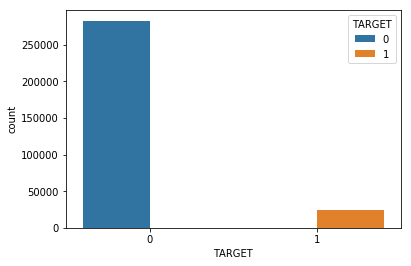

In [8]:
sb.countplot(x='TARGET',hue='TARGET',data=dataset_train)

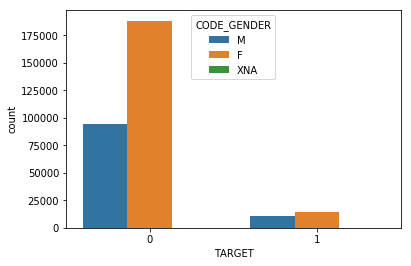

In [9]:
sb.countplot(x='TARGET',hue='CODE_GENDER',data=dataset_train)

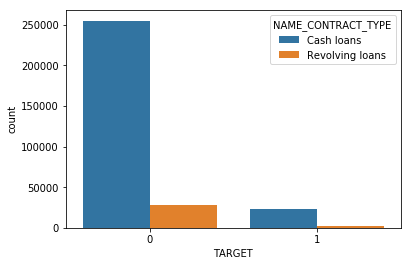

In [10]:
sb.countplot(x='TARGET',hue='NAME_CONTRACT_TYPE',data=dataset_train)

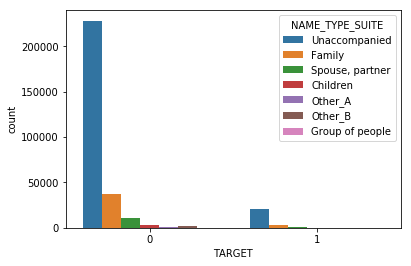

In [11]:
sb.countplot(x='TARGET',hue='NAME_TYPE_SUITE',data=dataset_train)

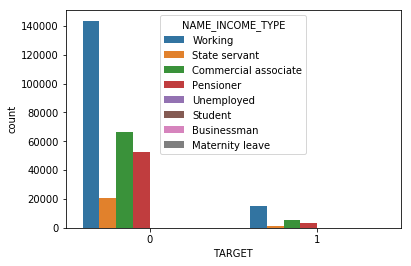

In [12]:
sb.countplot(x='TARGET',hue='NAME_INCOME_TYPE',data=dataset_train)

In [13]:
(dataset_train['DAYS_BIRTH']/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

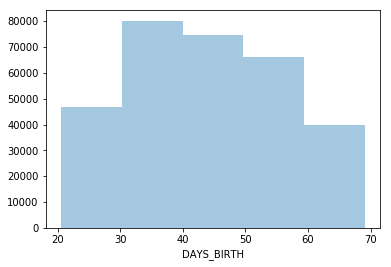

In [14]:
sb.distplot(dataset_train['DAYS_BIRTH']/-365,bins=5,kde=False)

In [15]:
len(dataset_train[dataset_train['DAYS_EMPLOYED'] > 0])


55374

In [16]:
(dataset_train[dataset_train['DAYS_EMPLOYED'] > 0]['TARGET'] == 1).value_counts()

False    52384
True      2990
Name: TARGET, dtype: int64

In [17]:
(abs(dataset_train['DAYS_EMPLOYED']/365)).describe()

count    307511.000000
mean        185.547239
std         382.037676
min           0.000000
25%           2.556164
50%           6.079452
75%          15.635616
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

In [18]:
max(dataset_train['DAYS_EMPLOYED'])

365243

In [19]:
len(dataset_train['DAYS_EMPLOYED'] == 365243)

307511

In [20]:
dataset_train['EMP_AN'] = dataset_train['DAYS_EMPLOYED'] == 365243

In [21]:
dataset_train['DAYS_EMPLOYED'] = dataset_train['DAYS_EMPLOYED'].replace({365243: np.nan})

In [22]:
(abs(dataset_train['DAYS_EMPLOYED']/365)).describe()

count    252137.000000
mean          6.531971
std           6.406466
min           0.000000
25%           2.101370
50%           4.515068
75%           8.698630
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

In [23]:
(abs(dataset_train['DAYS_REGISTRATION']/365)).describe()

count    307511.000000
mean         13.660604
std           9.651743
min           0.000000
25%           5.506849
50%          12.339726
75%          20.491781
max          67.594521
Name: DAYS_REGISTRATION, dtype: float64

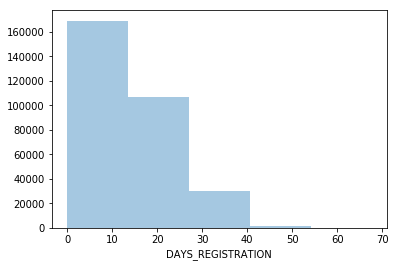

In [24]:
sb.distplot(dataset_train['DAYS_REGISTRATION']/-365,bins=5,kde=False)

In [25]:
len(dataset_train[dataset_train['DAYS_REGISTRATION']/-365 > 50]['DAYS_BIRTH']/-365 > 50)

80

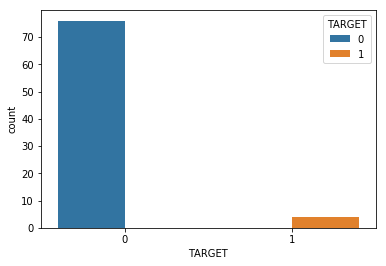

In [26]:
sb.countplot(x='TARGET',hue='TARGET',data=dataset_train[dataset_train['DAYS_REGISTRATION']/-365 > 50])

In [ ]:
dataset_train = dataset_train.drop(dataset_train[dataset_train['DAYS_REGISTRATION']/-365 > 50].index,axis=0)

In [27]:
len(dataset_train[dataset_train['DAYS_REGISTRATION']/-365 > 50]['DAYS_BIRTH']/-365 > 50)

80

In [28]:
dataset_train.shape

(307511, 123)

In [29]:
corr = dataset_train.corr(method='pearson')

In [30]:
column_names = list(corr.columns.values)
columns_to_remove = []
for idx,row in corr.iterrows():
    for i in range(0,len(row)):
        if row[i] > 0.70:
            if idx != column_names[i] and idx not in columns_to_remove and column_names[i] not in columns_to_remove:
                columns_to_remove.append(idx)
                columns_to_remove.append(column_names[i])
                print(idx + " - " + column_names[i])
                print(row[i])

CNT_CHILDREN - CNT_FAM_MEMBERS
0.8791606404404514
AMT_CREDIT - AMT_ANNUITY
0.7701380033120081
REGION_RATING_CLIENT - REGION_RATING_CLIENT_W_CITY
0.9508422141600533
REG_REGION_NOT_WORK_REGION - LIVE_REGION_NOT_WORK_REGION
0.8606267802758127
REG_CITY_NOT_WORK_CITY - LIVE_CITY_NOT_WORK_CITY
0.8255747229651973
APARTMENTS_AVG - ELEVATORS_AVG
0.8369580414057575
BASEMENTAREA_AVG - BASEMENTAREA_MODE
0.9734957846658345
YEARS_BEGINEXPLUATATION_AVG - YEARS_BEGINEXPLUATATION_MODE
0.9718933677078104
YEARS_BUILD_AVG - YEARS_BUILD_MODE
0.9894439219608308
COMMONAREA_AVG - COMMONAREA_MODE
0.9771470922157369
ENTRANCES_AVG - ENTRANCES_MODE
0.9777425562372521
FLOORSMAX_AVG - FLOORSMIN_AVG
0.7424367124617699
LANDAREA_AVG - LANDAREA_MODE
0.9736960647180231
LIVINGAPARTMENTS_AVG - LIVINGAREA_AVG
0.8807976108701437
NONLIVINGAPARTMENTS_AVG - NONLIVINGAPARTMENTS_MODE
0.969369828533874
NONLIVINGAREA_AVG - NONLIVINGAREA_MODE
0.9660865524310623
APARTMENTS_MODE - ELEVATORS_MODE
0.8262159264062834
FLOORSMAX_MODE - FL

In [31]:
#Columnd to remove die to high correlation (Only measured colinearity among pairs of parameters still have to deal
#with multi-colinearity)
columns_to_remove = ['CNT_CHILDREN','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_WORK_REGION',
                    'LIVE_CITY_NOT_WORK_CITY','ELEVATORS_AVG','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE',
                    'YEARS_BUILD_MODE','COMMONAREA_MODE','ENTRANCES_MODE','FLOORSMIN_AVG','LANDAREA_MODE',
                    'LIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_MODE','ELEVATORS_MODE','FLOORSMIN_MODE',
                    'LIVINGAREA_MODE','ELEVATORS_MEDI','FLOORSMIN_MEDI','LIVINGAREA_MEDI','OBS_60_CNT_SOCIAL_CIRCLE',
                    'DEF_60_CNT_SOCIAL_CIRCLE']

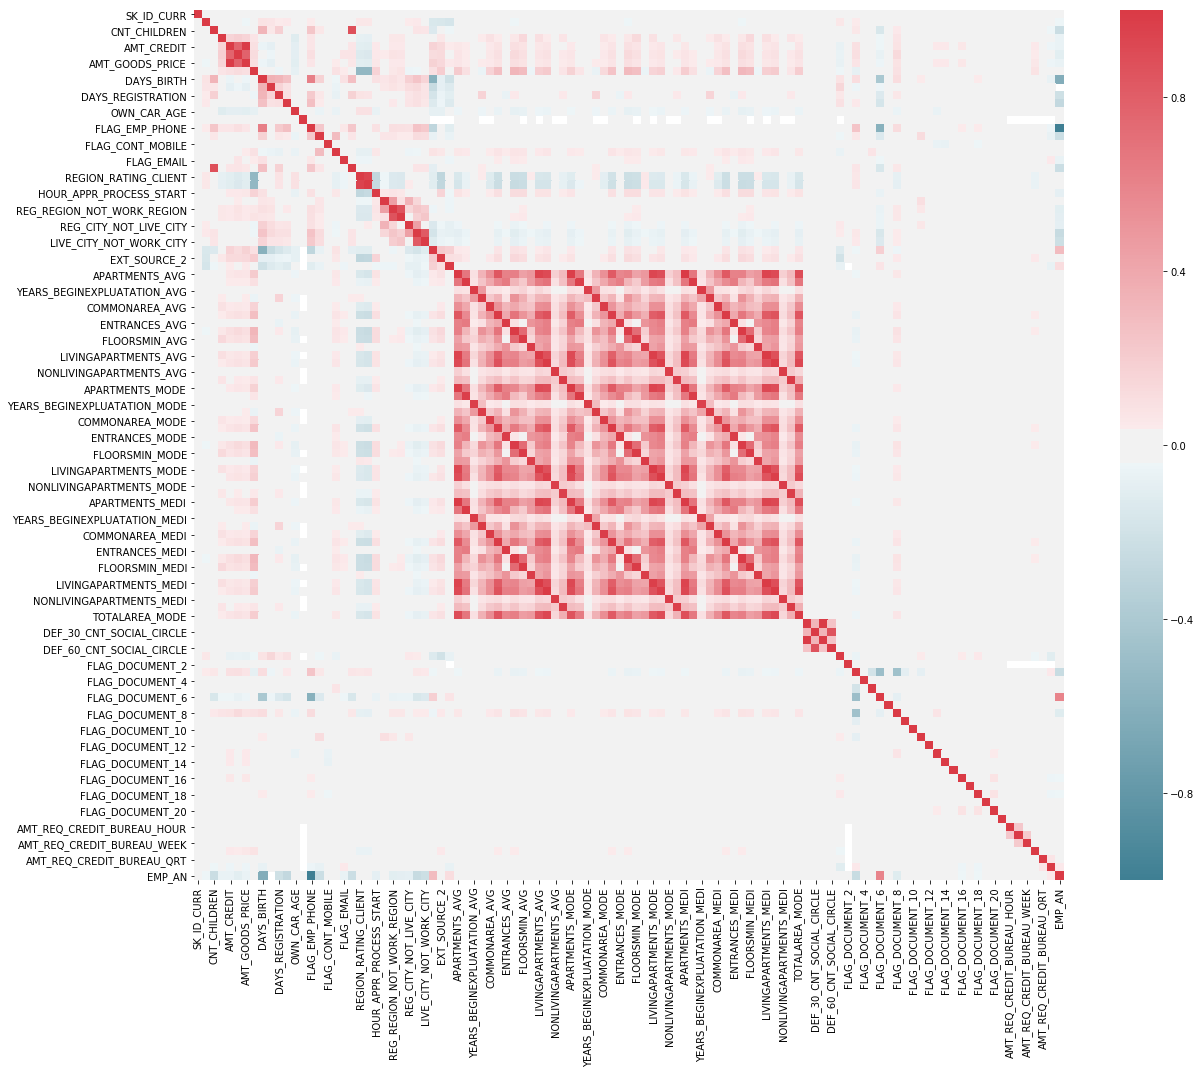

In [32]:
f,ax = plt.subplots(figsize=(20,16))
corr = dataset_train.corr()
corr_heatmap = sb.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sb.diverging_palette(220,10,as_cmap=True),square=True,ax=ax)
corr_figure = corr_heatmap.get_figure()
corr_figure.savefig("correlations_heatmap.png")

In [33]:
dataset_train = dataset_train.drop(columns_to_remove,axis=1)

In [34]:
dataset_train.select_dtypes('object').apply(pd.Series.nunique)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [35]:
columns_to_label_encode = ['NAME_CONTRACT_TYPE','FLAG_OWN_CAR',
                           'FLAG_OWN_REALTY','EMERGENCYSTATE_MODE']
starttime = time.time()
for column in columns_to_label_encode:
    le = LabelEncoder()
    dataset_train[column] = le.fit_transform(dataset_train[column].astype(str))
endtime = time.time()
print("Time Elapsed:- ")
print(endtime - starttime)

Time Elapsed:- 
0.3580188751220703


In [36]:
columns_to_one_hot_encode = ['CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
                           'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
                             'OCCUPATION_TYPE','ORGANIZATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                            'FONDKAPREMONT_MODE','WALLSMATERIAL_MODE','HOUSETYPE_MODE']
starttime = time.time()
for column in columns_to_one_hot_encode:
    le = LabelEncoder()
    oe = OneHotEncoder()
    label_encoded = le.fit_transform(dataset_train[column].astype(str))
    label_encoded = label_encoded.reshape(-1,1)
    one_hot_encoded = oe.fit_transform(label_encoded).toarray()
    df = pd.DataFrame(one_hot_encoded,columns=[column + str(i) for i in range(0,one_hot_encoded.shape[1])])
    df = df.drop([column + "0"],axis=1)
    dataset_train = pd.concat([dataset_train,df],axis=1)
    print(column + " - " + str(dataset_train.shape[0]) + " " + str(dataset_train.shape[1]))
dataset_train = dataset_train.drop(columns_to_one_hot_encode,axis=1)
dataset_train.shape

/Users/shashvatkedia/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


CODE_GENDER - 307511 103


/Users/shashvatkedia/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


NAME_TYPE_SUITE - 307511 110


/Users/shashvatkedia/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


NAME_INCOME_TYPE - 307511 117


/Users/shashvatkedia/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


NAME_EDUCATION_TYPE - 307511 121


/Users/shashvatkedia/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


NAME_FAMILY_STATUS - 307511 126


/Users/shashvatkedia/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


NAME_HOUSING_TYPE - 307511 131


/Users/shashvatkedia/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OCCUPATION_TYPE - 307511 149


/Users/shashvatkedia/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


ORGANIZATION_TYPE - 307511 206


/Users/shashvatkedia/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


WEEKDAY_APPR_PROCESS_START - 307511 212


/Users/shashvatkedia/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


FONDKAPREMONT_MODE - 307511 216


/Users/shashvatkedia/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


WALLSMATERIAL_MODE - 307511 223


/Users/shashvatkedia/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


HOUSETYPE_MODE - 307511 226


(307511, 214)

In [37]:
dataset_train['DIR'] = dataset_train['AMT_CREDIT']/dataset_train['AMT_INCOME_TOTAL']
dataset_train['AIR'] = dataset_train['AMT_ANNUITY']/dataset_train['AMT_INCOME_TOTAL']
dataset_train['ACR'] = dataset_train['AMT_ANNUITY']/dataset_train['AMT_CREDIT']
dataset_train['DAR'] = dataset_train['DAYS_EMPLOYED']/dataset_train['DAYS_BIRTH']

In [38]:
#Using random under sampling to handle imbalanced dataset
under_sampled_dataset_train_0 = dataset_train[dataset_train.TARGET == 0].sample(40000)
under_sampled_dataset_train_1 = dataset_train[dataset_train.TARGET == 1].sample(20000)
dataset_train = pd.concat([under_sampled_dataset_train_0,under_sampled_dataset_train_1],ignore_index=True)

In [39]:
from sklearn.preprocessing import StandardScaler, Imputer
imputer = Imputer(strategy='median')
scaler = StandardScaler()
dataset_train_tr = imputer.fit_transform(dataset_train.drop(['SK_ID_CURR','TARGET'],axis=1))
dataset_train_tr = scaler.fit_transform(dataset_train_tr)

/Users/shashvatkedia/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [40]:
X = dataset_train_tr
y = dataset_train['TARGET']

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=232)

In [42]:
X_test = pd.DataFrame(X_test,columns=dataset_train.columns.drop(['SK_ID_CURR','TARGET']))

In [43]:
X_test.shape

(12000, 216)

In [44]:
y_test.shape

(12000,)

In [45]:
#Using SMOTE(Synthetic Minority Oversampling Technique) to handle imbalanced dataset
smote_train = SMOTE(random_state=232)
os_data_X,os_data_y = smote_train.fit_sample(X_train,y_train)
X_train = pd.DataFrame(data=os_data_X,columns=dataset_train.columns.drop(['SK_ID_CURR','TARGET']) )
y_train = pd.DataFrame(data=os_data_y,columns=["TARGET"])

In [46]:
X_test.shape

(12000, 216)

In [47]:
y_test.shape

(12000,)

In [48]:
smote_test = SMOTE(random_state=232)
os_data_X,os_data_Y = smote_test.fit_sample(X_test,y_test)
X_test = pd.DataFrame(data=os_data_X,columns=dataset_train.columns.drop(['SK_ID_CURR','TARGET']))
y_test = pd.DataFrame(data=os_data_Y,columns=['TARGET'])

In [49]:
X_train.shape

(63824, 216)

In [50]:
y_train.shape

(63824, 1)

In [51]:
X_test.shape

(16176, 216)

In [52]:
y_test.shape

(16176, 1)

In [64]:
def generate_classifier_report(classifier,predictions,predictions_prob,name):
    print(classification_report(y_test,predictions))
    logit_roc_score = roc_auc_score(y_test,predictions)
    fpr, tpr, thresholds = roc_curve(y_test,predictions_prob)
    plt.figure()
    plt.plot(fpr,tpr,label=name + " AUC score:- " + str(logit_roc_score))
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.xlabel('False Positive Rate (FP / (FP + TN))')
    plt.ylabel('True Positive Rate (TP / (TP + FN))')
    plt.title('Receiver Operating Characteristics Curve')
    plt.legend(loc="lower right")
    plt.savefig(name + "_roc_curve")
    plt.show()

In [54]:
X.shape

(60000, 216)

In [55]:
y.shape

(60000,)

In [56]:
y_train = np.array(y_train)
y_train = y_train.ravel()

In [58]:
y_test = np.array(y_test)
y_test = y_test.ravel()

In [ ]:
#Use k-fold cross validation to generate estimate of test accuracy

In [59]:
clf = LogisticRegression(C=0.4,max_iter = 1000)
clf.fit(X_train,y_train)

/Users/shashvatkedia/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
prediction = clf.predict(X_test)

In [61]:
accuracy_score(y_test,prediction)

0.7007912957467853

In [62]:
confusion_matrix(y_test,prediction)

array([[5684, 2404],
       [2436, 5652]])

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      8088
           1       0.70      0.70      0.70      8088

   micro avg       0.70      0.70      0.70     16176
   macro avg       0.70      0.70      0.70     16176
weighted avg       0.70      0.70      0.70     16176



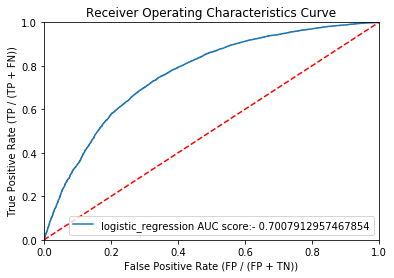

In [65]:
generate_classifier_report(clf,prediction,clf.predict_proba(X_test)[:,1],name="logistic_regression")

In [66]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train,y_train)

/Users/shashvatkedia/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [67]:
pred = clf.predict(X_test)

In [68]:
accuracy_score(y_test,pred)

0.7004821958456974

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      8088
           1       0.70      0.70      0.70      8088

   micro avg       0.70      0.70      0.70     16176
   macro avg       0.70      0.70      0.70     16176
weighted avg       0.70      0.70      0.70     16176



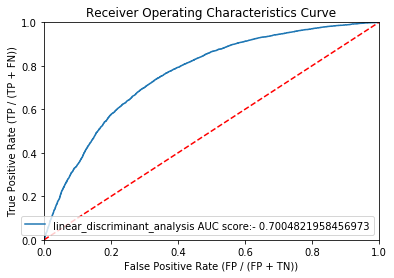

In [69]:
generate_classifier_report(clf,pred,clf.predict_proba(X_test)[:,1],name="linear_discriminant_analysis")

In [70]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train,y_train)

/Users/shashvatkedia/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/shashvatkedia/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [72]:
pred = clf.predict(X_test)

In [73]:
accuracy_score(y_test,pred)

0.5137240356083086

              precision    recall  f1-score   support

           0       0.51      0.91      0.65      8088
           1       0.56      0.12      0.20      8088

   micro avg       0.51      0.51      0.51     16176
   macro avg       0.54      0.51      0.43     16176
weighted avg       0.54      0.51      0.43     16176



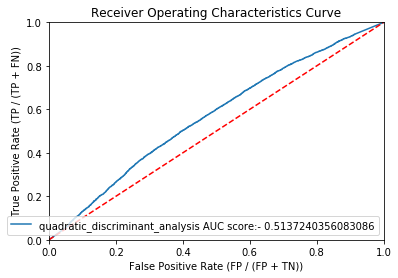

In [74]:
generate_classifier_report(clf,pred,clf.predict_proba(X_test)[:,1],"quadratic_discriminant_analysis")

/Users/shashvatkedia/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/shashvatkedia/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Time to train 10 trees:- 
2.1669671535491943
Accuracy score for 10 trees:- 
0.7396142433234422
Confusion matrix for 10 trees:- 
[6498 1590 2622 5466]
Classifier report for 10 trees:- 
              precision    recall  f1-score   support

           0       0.71      0.80      0.76      8088
           1       0.77      0.68      0.72      8088

   micro avg       0.74      0.74      0.74     16176
   macro avg       0.74      0.74      0.74     16176
weighted avg       0.74      0.74      0.74     16176



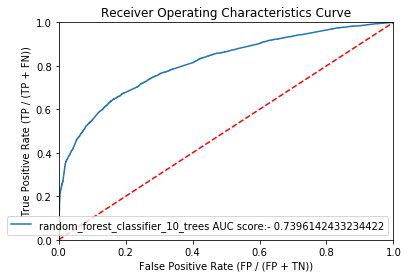

/Users/shashvatkedia/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/shashvatkedia/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Time to train 20 trees:- 
4.327309846878052
Accuracy score for 20 trees:- 
0.7561201780415431
Confusion matrix for 20 trees:- 
[6625 1463 2482 5606]
Classifier report for 20 trees:- 
              precision    recall  f1-score   support

           0       0.73      0.82      0.77      8088
           1       0.79      0.69      0.74      8088

   micro avg       0.76      0.76      0.76     16176
   macro avg       0.76      0.76      0.76     16176
weighted avg       0.76      0.76      0.76     16176



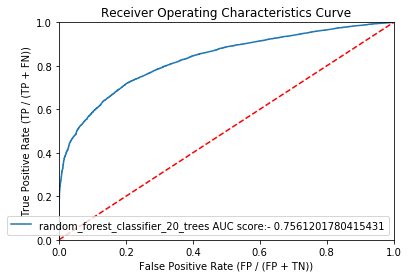

Time to train 30 trees:- 
6.666034936904907
Accuracy score for 30 trees:- 
0.7624876360039565
Confusion matrix for 30 trees:- 
[6718 1370 2472 5616]
Classifier report for 30 trees:- 
              precision    recall  f1-score   support

           0       0.73      0.83      0.78      8088
           1       0.80      0.69      0.75      8088

   micro avg       0.76      0.76      0.76     16176
   macro avg       0.77      0.76      0.76     16176
weighted avg       0.77      0.76      0.76     16176



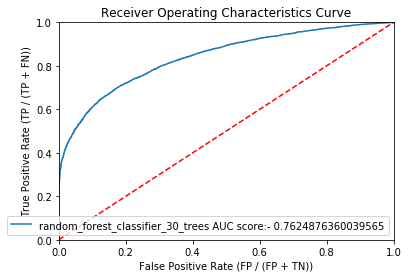

Time to train 40 trees:- 
11.54301905632019
Accuracy score for 40 trees:- 
0.7647749752720079
Confusion matrix for 40 trees:- 
[6754 1334 2471 5617]
Classifier report for 40 trees:- 
              precision    recall  f1-score   support

           0       0.73      0.84      0.78      8088
           1       0.81      0.69      0.75      8088

   micro avg       0.76      0.76      0.76     16176
   macro avg       0.77      0.76      0.76     16176
weighted avg       0.77      0.76      0.76     16176



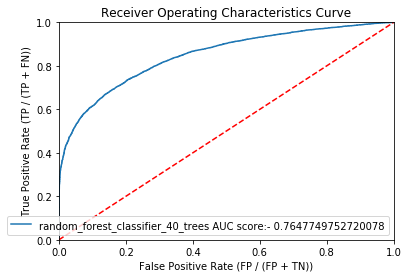

Time to train 50 trees:- 
11.499874114990234
Accuracy score for 50 trees:- 
0.7684223541048467
Confusion matrix for 50 trees:- 
[6789 1299 2447 5641]
Classifier report for 50 trees:- 
              precision    recall  f1-score   support

           0       0.74      0.84      0.78      8088
           1       0.81      0.70      0.75      8088

   micro avg       0.77      0.77      0.77     16176
   macro avg       0.77      0.77      0.77     16176
weighted avg       0.77      0.77      0.77     16176



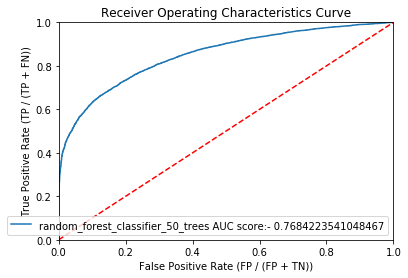

Time to train 100 trees:- 
19.38819909095764
Accuracy score for 100 trees:- 
0.7726879327398615
Confusion matrix for 100 trees:- 
[6834 1254 2423 5665]
Classifier report for 100 trees:- 
              precision    recall  f1-score   support

           0       0.74      0.84      0.79      8088
           1       0.82      0.70      0.75      8088

   micro avg       0.77      0.77      0.77     16176
   macro avg       0.78      0.77      0.77     16176
weighted avg       0.78      0.77      0.77     16176



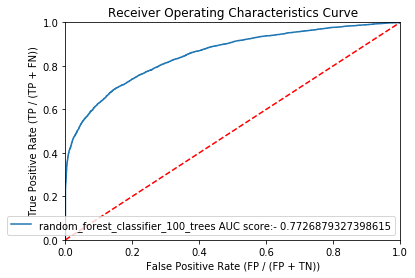

Time to train 150 trees:- 
28.750619173049927
Accuracy score for 150 trees:- 
0.7712042532146389
Confusion matrix for 150 trees:- 
[6854 1234 2467 5621]
Classifier report for 150 trees:- 
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      8088
           1       0.82      0.69      0.75      8088

   micro avg       0.77      0.77      0.77     16176
   macro avg       0.78      0.77      0.77     16176
weighted avg       0.78      0.77      0.77     16176



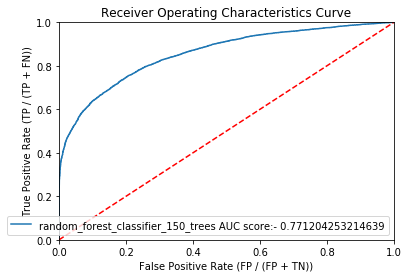

Time to train 200 trees:- 
40.75320291519165
Accuracy score for 200 trees:- 
0.7738625123639961
Confusion matrix for 200 trees:- 
[6892 1196 2462 5626]
Classifier report for 200 trees:- 
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      8088
           1       0.82      0.70      0.75      8088

   micro avg       0.77      0.77      0.77     16176
   macro avg       0.78      0.77      0.77     16176
weighted avg       0.78      0.77      0.77     16176



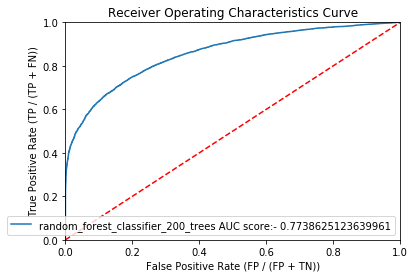

Time to train 250 trees:- 
48.490683794021606
Accuracy score for 250 trees:- 
0.7750989119683481
Confusion matrix for 250 trees:- 
[6900 1188 2450 5638]
Classifier report for 250 trees:- 
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      8088
           1       0.83      0.70      0.76      8088

   micro avg       0.78      0.78      0.78     16176
   macro avg       0.78      0.78      0.77     16176
weighted avg       0.78      0.78      0.77     16176



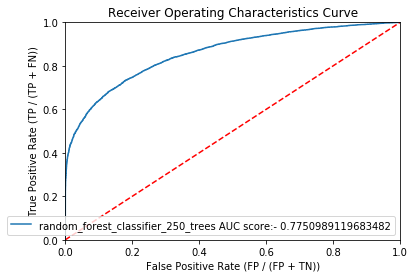

Time to train 300 trees:- 
59.356505155563354
Accuracy score for 300 trees:- 
0.7760880316518298
Confusion matrix for 300 trees:- 
[6884 1204 2418 5670]
Classifier report for 300 trees:- 
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      8088
           1       0.82      0.70      0.76      8088

   micro avg       0.78      0.78      0.78     16176
   macro avg       0.78      0.78      0.77     16176
weighted avg       0.78      0.78      0.77     16176



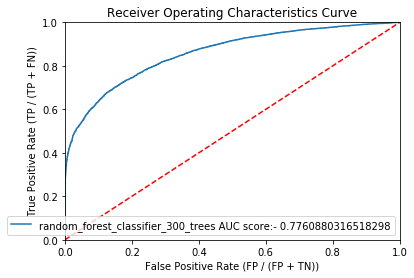

Time to train 400 trees:- 
77.18793487548828
Accuracy score for 400 trees:- 
0.7761498516320475
Confusion matrix for 400 trees:- 
[6895 1193 2428 5660]
Classifier report for 400 trees:- 
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      8088
           1       0.83      0.70      0.76      8088

   micro avg       0.78      0.78      0.78     16176
   macro avg       0.78      0.78      0.77     16176
weighted avg       0.78      0.78      0.77     16176



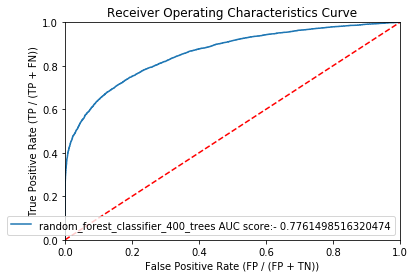

Time to train 500 trees:- 
99.60909271240234
Accuracy score for 500 trees:- 
0.7759643916913946
Confusion matrix for 500 trees:- 
[6916 1172 2452 5636]
Classifier report for 500 trees:- 
              precision    recall  f1-score   support

           0       0.74      0.86      0.79      8088
           1       0.83      0.70      0.76      8088

   micro avg       0.78      0.78      0.78     16176
   macro avg       0.78      0.78      0.77     16176
weighted avg       0.78      0.78      0.77     16176



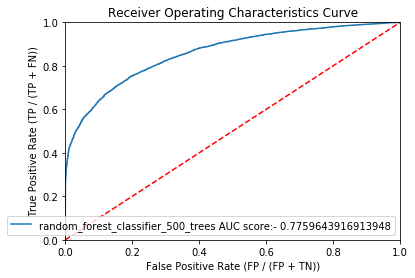

Time to train 750 trees:- 
146.80436420440674
Accuracy score for 750 trees:- 
0.7763353115727003
Confusion matrix for 750 trees:- 
[6921 1167 2451 5637]
Classifier report for 750 trees:- 
              precision    recall  f1-score   support

           0       0.74      0.86      0.79      8088
           1       0.83      0.70      0.76      8088

   micro avg       0.78      0.78      0.78     16176
   macro avg       0.78      0.78      0.77     16176
weighted avg       0.78      0.78      0.77     16176



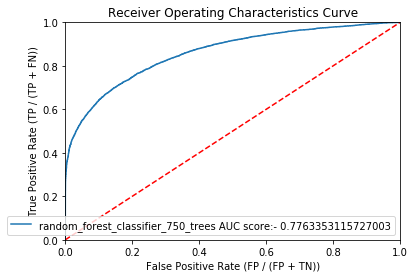

Time to train 1000 trees:- 
195.41380977630615
Accuracy score for 1000 trees:- 
0.7764589515331355
Confusion matrix for 1000 trees:- 
[6919 1169 2447 5641]
Classifier report for 1000 trees:- 
              precision    recall  f1-score   support

           0       0.74      0.86      0.79      8088
           1       0.83      0.70      0.76      8088

   micro avg       0.78      0.78      0.78     16176
   macro avg       0.78      0.78      0.78     16176
weighted avg       0.78      0.78      0.78     16176



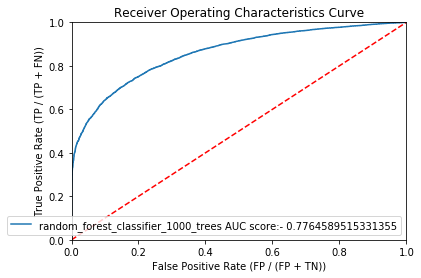

In [75]:
#Have to use Bayesian Optimization to find better set of hyperparameters
#performant value found 400
no_of_trees = [10,20,30,40,50,100,150,200,250,300,400,500,750,1000]
error = []
for noft in no_of_trees:
    starttime = time.time()
    classifier = RandomForestClassifier(n_estimators=noft,max_depth=25,oob_score=True)
    classifier.fit(X_train,y_train)
    endtime = time.time()
    print("Time to train " + str(noft) + " trees:- ")
    print(endtime - starttime)
    error.append(classifier.oob_score_)
    prediction = classifier.predict(X_test)
    print("Accuracy score for " + str(noft) + " trees:- ")
    print(accuracy_score(y_test,prediction))
    print("Confusion matrix for " + str(noft) + " trees:- ")
    print(confusion_matrix(y_test,prediction).ravel())
    print("Classifier report for " + str(noft) + " trees:- ")
    generate_classifier_report(classifier,prediction,classifier.predict_proba(X_test)[:,1],"random_forest_classifier_" + str(noft) + "_trees")

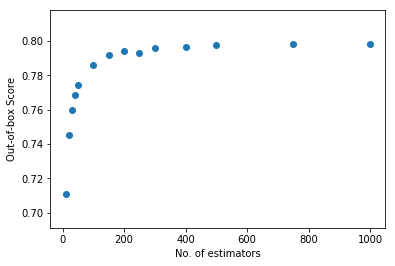

In [76]:
plt.scatter(no_of_trees,error)
plt.xlabel("No. of estimators")
plt.ylabel("Out-of-box Score")
plt.savefig("error_vs_nestimators.jpg")

In [77]:
starttime = time.time()
boosting = XGBClassifier(alpha=1,eval_metric='logloss',max_depth=25,n_estimators=400,verbosity=2)
boosting.fit(X_train,y_train)
endtime = time.time()
print("Time to train XGBClassifier :- ")
print(endtime - starttime)

Time to train XGBClassifier :- 
877.7968111038208


In [78]:
pred = boosting.predict(X_test)
accuracy_score(y_test,pred)

0.7849901088031652

In [79]:
confusion_matrix(y_test,pred)

array([[6895, 1193],
       [2285, 5803]])

              precision    recall  f1-score   support

           0       0.75      0.85      0.80      8088
           1       0.83      0.72      0.77      8088

   micro avg       0.78      0.78      0.78     16176
   macro avg       0.79      0.78      0.78     16176
weighted avg       0.79      0.78      0.78     16176



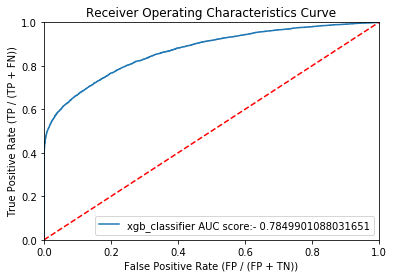

In [80]:
generate_classifier_report(boosting,pred,boosting.predict_proba(X_test)[:,1],'xgb_classifier')

In [81]:
starttime = time.time()
clf = lgb.LGBMClassifier(boosting_type='gbdt',n_estimators=400,max_depth=25)
clf.fit(X_train,y_train)
endtime = time.time()
print("Time to train LightGBM classifier:- ")
print(endtime - starttime)

Time to train LightGBM classifier:- 
33.34529089927673


In [82]:
pref = clf.predict(X_test)
accuracy_score(y_test,pred)

0.7849901088031652

In [83]:
confusion_matrix(y_test,pred)

array([[6895, 1193],
       [2285, 5803]])

              precision    recall  f1-score   support

           0       0.75      0.85      0.80      8088
           1       0.83      0.72      0.77      8088

   micro avg       0.78      0.78      0.78     16176
   macro avg       0.79      0.78      0.78     16176
weighted avg       0.79      0.78      0.78     16176



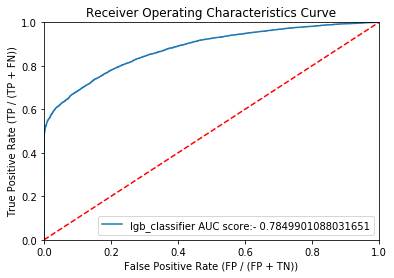

In [84]:
generate_classifier_report(clf,pred,clf.predict_proba(X_test)[:,1],'lgb_classifier')

In [85]:
X = tf.placeholder(shape=[None,222],dtype=tf.float32)
y = tf.placeholder(shape=[None],dtype=tf.int64)

In [86]:
weights = {
    'W1': tf.Variable(tf.truncated_normal(shape=[222,140])),
    'W2': tf.Variable(tf.truncated_normal(shape=[140,70])),
    'W3': tf.Variable(tf.truncated_normal(shape=[70,27])),
    'W4': tf.Variable(tf.truncated_normal(shape=[27,1]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal(shape=[140])),
    'b2': tf.Variable(tf.truncated_normal(shape=[70])),
    'b3': tf.Variable(tf.truncated_normal(shape=[27])),
    'b4': tf.Variable(tf.truncated_normal(shape=[1]))
}

In [87]:
def get_model(X,weights,biases):
    op1 = tf.add(tf.matmul(X,weights['W1']),biases['b1'])
    relu_op1 = tf.nn.relu(op1) 
    op2 = tf.add(tf.matmul(relu_op1,weights['W2']),biases['b2'])
    relu_op2 = tf.nn.relu(op2)
    op3 = tf.add(tf.matmul(relu_op2,weights['W3']),biases['b3'])
    relu_op3 = tf.nn.relu(op3)
    op4 = tf.add(tf.matmul(relu_op3,weights['W4']),biases['b4'])
    return op4

In [88]:
pred = get_model(X,weights,biases)
optimizer = tf.train.AdamOptimizer(learning_rate=0.)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=pred))
train_step = optimizer.minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [ ]:
#Improve accuracy here 
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(0,10):
        cost = 0
        total_batch = X_train.shape[0]/100
        X_batches = np.array_split(X_train,total_batch)
        y_batches = np.array_split(y_train,total_batch)
        for j in range(0,int(total_batch)):
            g,c = sess.run([train_step,loss],feed_dict={
                X: X_batches[j],
                y: y_batches[j]
            })
            cost = cost + c/total_batch
        print("Epoch:- " + str(i) + " Cost:- " + str(cost))
    correct_prediction = tf.equal(tf.argmax(pred,1),y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))
    print("Accuracy:- " + str(accuracy.eval({X: X_test,y: y_test})))

In [90]:
starttime = time.time()
clf = SVC(gamma=0.001, C=1.0)
clf.fit(X_train,y_train)
endtime = time.time()
print("Time to train SVC classifier:- ")
print(endtime - starttime)

Time to train SVC classifier:- 
1062.8776919841766


In [91]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.7087042532146389

In [92]:
confusion_matrix(y_test,pred).ravel()

array([5738, 2350, 2362, 5726])